In [15]:
import torch
import pandas as pd
import plotnine as pn

import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")
from misc.util import encoders_to_df, load_encoders
from misc.vis import numeric_col_to_categorical

In [16]:
torch.set_printoptions(sci_mode=False)
encoders = torch.load("/Users/nathanielimel/uci/projects/ibsg/multirun/states=10/signals=10/prior=-8/dist=squared_dist/meaning_certainty=0/dynamics=two_population_rd/population_size=None/num_trials=8/seed=42/discr_need=0.0/final_encoders.pt")

In [17]:
encoders[0][2]

tensor([    0.0003,     0.0000,     0.0000,     0.0004,     0.0312,     0.5563,
            0.3924,     0.0150,     0.0038,     0.0006])

In [18]:
encoder = encoders[2]
encoders_singleton = torch.stack([encoder])

In [19]:
data = encoders_to_df(encoders_singleton)
data["meanings"].tolist()
data = numeric_col_to_categorical(data, "meanings")
data = numeric_col_to_categorical(data, "words")

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data

,trial,words,meanings,naming probability \n,p
0,0.000,0,0,0.125,0.125
1,0.000,1,0,0.125,0.125
2,0.000,2,0,0.125,0.125
3,0.000,3,0,0.125,0.125
4,0.000,4,0,0.125,0.125
...,...,...,...,...,...
95,0.000,5,9,0.000,0.000
96,0.000,6,9,0.000,0.000
97,0.000,7,9,0.000,0.000
98,0.000,8,9,0.500,0.500


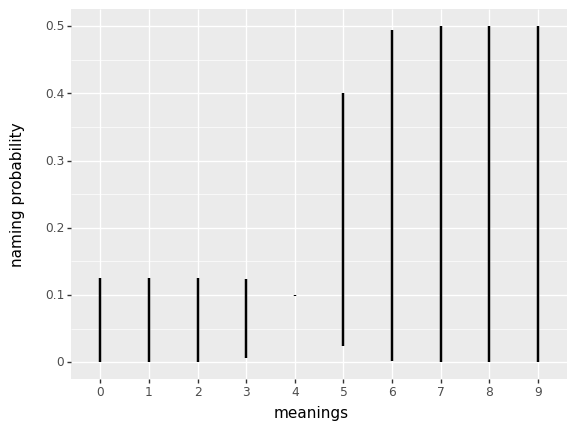

<ggplot: (358613971)>

In [24]:
(
    pn.ggplot(data, pn.aes(x="meanings", y="naming probability \n"))
    + pn.geom_line(
     mapping=pn.aes(
        # color="words",
        ),

     size=1,
    )
)